In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from data import load_data
from config import Species, TARGET, FEATURES_DESCRIPTION

# Load data for the given species
SPECIES: Species = "spruce"

df = load_data(SPECIES)

print(f"Data shape: {df.shape}")
print(f"Data columns: {df.columns}")
# # Convert categorical features to codes
# df = cat_to_codes(df, CATEGORICAL_FEATURES)

Data shape: (14456, 103)
Data columns: ['tree_id', 'period_start', 'period_end', 'nb_defol_obs', 'defoliation_max', 'defoliation_min', 'defoliation_mean', 'defoliation_median', 'defoliation_last', 'social_class_min', 'social_class_max', 'social_class_mode', 'social_class_last', 'was_dominant', 'was_codominant', 'was_subdominant', 'was_suppressed', 'was_dying', 'survey_year', 'plot_id', 'country_code', 'country', 'tree_species_code', 'specie', 'plot_code', 'tree_number', 'diameter_start', 'diameter_end', 'period_duration_d', 'period_duration_y', 'growth', 'growth_rate', 'growth_rel', 'growth_rate_rel', 'diameter_method_code_start', 'diameter_method_code_end', 'plot_latitude', 'plot_longitude', 'plot_slope', 'plot_orientation', 'plot_altitude', 'dep_ph', 'dep_cond', 'dep_k', 'dep_ca', 'dep_mg', 'dep_na', 'dep_n_nh4', 'dep_cl', 'dep_n_no3', 'dep_s_so4', 'dep_alk', 'dep_n_tot', 'dep_doc', 'dep_al', 'dep_mn', 'dep_fe', 'dep_p_po4', 'dep_cu', 'dep_zn', 'dep_hg', 'dep_pb', 'dep_co', 'dep_mo',

In [12]:
with pl.Config(
    tbl_formatting="MARKDOWN",
    tbl_hide_column_data_types=True,
    tbl_rows=-1,
    tbl_width_chars=200,
    fmt_str_lengths=200,
) as cfg:
    print(
        pl.from_dicts(
            [
                {**{"feature": feature}, **descr}
                for feature, descr in FEATURES_DESCRIPTION.items()
            ]
        )
    )

shape: (70, 3)
| feature            | description                                  | level |
|--------------------|----------------------------------------------|-------|
| diameter_end       | Diameter at the end of the period            | tree  |
| defoliation_max    | Maximum defoliation of the growth period     | tree  |
| defoliation_min    | Minimum defoliation of the growth period     | tree  |
| defoliation_mean   | Mean defoliation of the growth period        | tree  |
| defoliation_median | Median defoliation of the growth period      | tree  |
| social_class_min   | Minimum social class of the growth period    | tree  |
| plot_latitude      | Latitude of the plot                         | plot  |
| plot_longitude     | Longitude of the plot                        | plot  |
| plot_slope         | Slope of the plot                            | plot  |
| plot_orientation   | Orientation of the plot                      | plot  |
| plot_altitude      | Altitude of the plot      

In [5]:
# Basic statistics
print(f"Species = {SPECIES}")
print(f"# of records = {len(df)}")
print(f"# of countries = {df['country'].n_unique()}")
print(f"# of plots = {df['plot_id'].n_unique()}")
print(f"# of trees = {df['tree_id'].n_unique()}")

Species = spruce
# of records = 14456
# of countries = 17
# of plots = 143
# of trees = 7827


Distribution of the number of trees per plot:
# min = 1
# max = 759
# mean = 101.0909090909091
# of single-tree plots = 9


Text(0.5, 1.0, 'Distribution of the number of trees per plot')

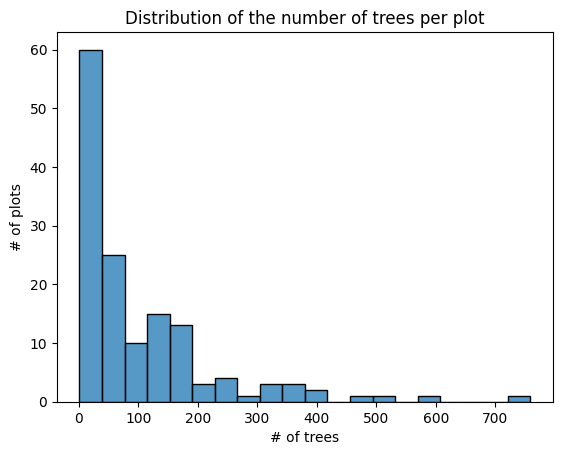

In [6]:
# Distribution of the number of trees per plot
print("Distribution of the number of trees per plot:")
num_trees = df.group_by("plot_id").agg(pl.count("tree_id").alias("num_trees"))

print(f"# min = {num_trees['num_trees'].min()}")
print(f"# max = {num_trees['num_trees'].max()}")
print(f"# mean = {num_trees['num_trees'].mean()}")
print(f"# of single-tree plots = {len(num_trees.filter(num_trees['num_trees'] == 1))}")

_ = sns.histplot(num_trees["num_trees"], bins=20)
plt.xlabel("# of trees")
plt.ylabel("# of plots")
plt.title("Distribution of the number of trees per plot")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '04.0302'),
  Text(1, 0, '04.0303'),
  Text(2, 0, '04.0305'),
  Text(3, 0, '04.0701'),
  Text(4, 0, '04.0702'),
  Text(5, 0, '04.0906'),
  Text(6, 0, '04.1401'),
  Text(7, 0, '04.1402'),
  Text(8, 0, '04.1404'),
  Text(9, 0, '04.1605'),
  Text(10, 0, '14.0004'),
  Text(11, 0, '14.0015'),
  Text(12, 0, '14.0017'),
  Text(13, 0, '14.0019'),
  Text(14, 0, '50.0001'),
  Text(15, 0, '50.0002'),
  Text(16, 0, '50.0018'),
  Text(17, 0, '54.0203'),
  Text(18, 0, '54.0207'),
  Text(19, 0, '55.0007'),
  Text(20, 0, '58.2161')])

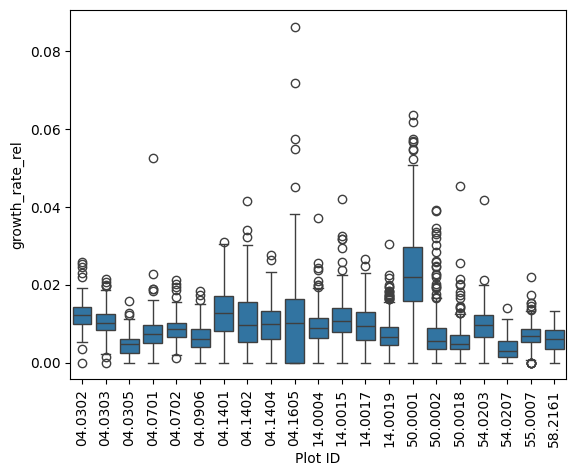

In [7]:
# Plot box plots of target variable by plot_id

# Keep only plots with at least 10 trees
data = df.with_columns(
    pl.col("tree_id").n_unique().over("plot_id").alias("num_trees")
).filter(pl.col("num_trees") >= 100)
sns.boxplot(x="plot_id", y=TARGET, data=data.to_pandas())
plt.xlabel("Plot ID")

# Vertical label for x-axis
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribution of temperature')

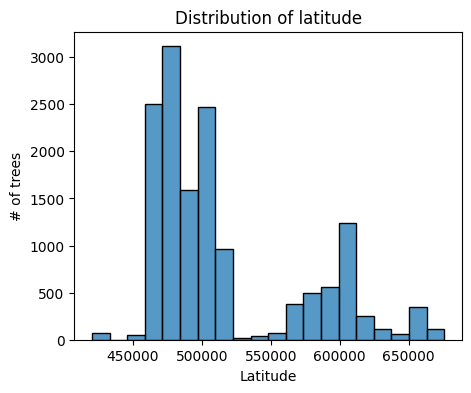

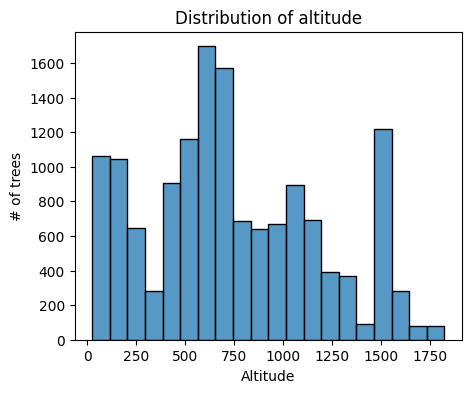

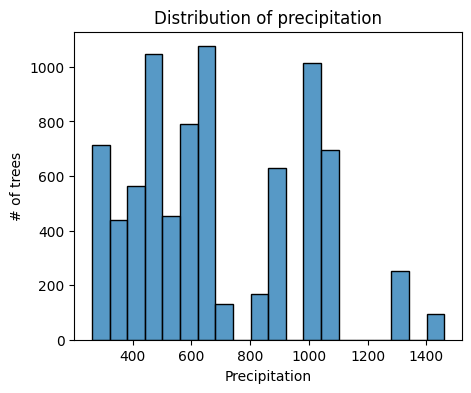

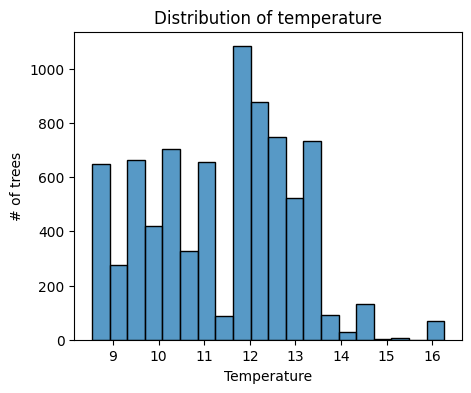

In [8]:
# Plot distribution of latitude and longitude
plt.figure(figsize=(5, 4))
sns.histplot(df["plot_latitude"], bins=20)
plt.xlabel("Latitude")
plt.ylabel("# of trees")
plt.title("Distribution of latitude")

# Plot distributions of altitudes
plt.figure(figsize=(5, 4))
sns.histplot(df["plot_altitude"], bins=20)
plt.xlabel("Altitude")
plt.ylabel("# of trees")
plt.title("Distribution of altitude")

# Plot distributions of precipitation
plt.figure(figsize=(5, 4))
sns.histplot(df["soph_avg_precip"], bins=20)
plt.xlabel("Precipitation")
plt.ylabel("# of trees")
plt.title("Distribution of precipitation")

# Plot distributions of temperature
plt.figure(figsize=(5, 4))
sns.histplot(df["soph_avg_temp"], bins=20)
plt.xlabel("Temperature")
plt.ylabel("# of trees")
plt.title("Distribution of temperature")